# Курсовой проект

**Подключение библиотек и скриптов**

In [758]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Описание датасета**

Статистические данные о ряде квартир.


* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности.
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [759]:
df = pd.read_csv('train.csv')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [761]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df = reduce_mem_usage(df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


## EDA

In [762]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315720,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,4859.01902,43.587592,0.839522,21.058716,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

**Целевая переменная - Price**

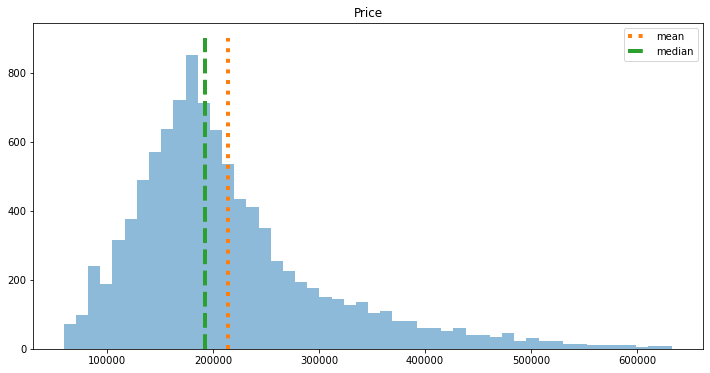

In [764]:
plt.figure(figsize = (12, 6))

plt.hist(df['Price'], bins=50, alpha=0.5) 

y = np.linspace(0, 900, 10)
plt.plot([df['Price'].mean()] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([df['Price'].median()] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Price')
plt.legend()
plt.show()

### Анализ, приведение типов признаков и обработка выбросов.

**id** при обработке данных не должен ни на что влиять, приведём столбец к строковому типу.

In [765]:
df.Id = df.Id.astype('str')

Признак **DistrictId** явно категориальный. Изменим ему тип.

In [766]:
df.DistrictId = df.DistrictId.astype('category')

Посмотрим на данные об **общей площади**.

In [767]:
df['Square'].value_counts().sort_index()

1.136859      1
1.988943      1
2.377248      1
2.596351      1
2.954309      1
             ..
212.932358    1
275.645294    1
409.425171    1
604.705994    1
641.065186    1
Name: Square, Length: 9995, dtype: int64

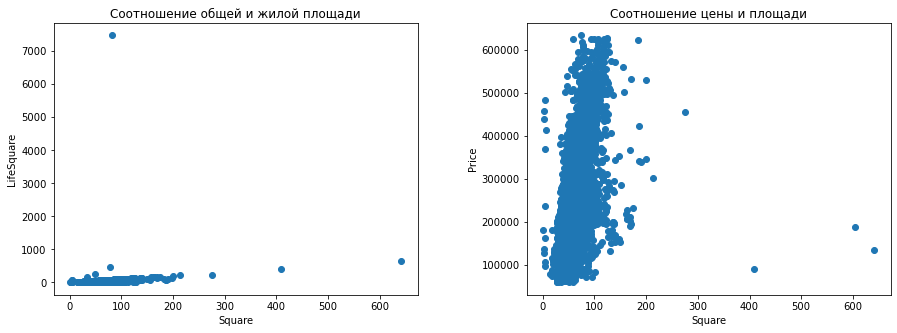

In [768]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.scatter(df['Square'], df['LifeSquare'])
ax1.set_xlabel('Square')
ax1.set_ylabel('LifeSquare')
ax1.set_title('Соотношение общей и жилой площади')
ax2.scatter(df['Square'], df['Price'])
ax2.set_xlabel('Square')
ax2.set_ylabel('Price')
ax2.set_title('Соотношение цены и площади')
fig.set_size_inches(15, 5)
plt.subplots_adjust(wspace=0.3)

Слишком большие значения площади - явно ошибочны. Как и значения общей площади менее 10 кв.м. Обработаем выбросы прировняв их к медиане.

In [769]:
df.loc[(df['Square'] < 10) | (df['Square'] > 250), 'Square'] = df.Square.median()

Изучим признак **KitchenSquare**.

In [770]:
df['KitchenSquare'].value_counts().sort_index()

0.0        697
1.0       2460
2.0          4
3.0         22
4.0         39
5.0       1169
6.0       1038
7.0        609
8.0       1306
9.0        843
10.0      1075
11.0       233
12.0       249
13.0        67
14.0        51
15.0        31
16.0        16
17.0        12
18.0         6
19.0        11
20.0        14
21.0         1
22.0         3
23.0         1
25.0         2
26.0         1
27.0         1
29.0         1
30.0         2
31.0         1
32.0         2
35.0         1
36.0         1
37.0         2
39.0         1
40.0         1
41.0         2
42.0         1
43.0         2
48.0         1
51.0         2
53.0         1
54.0         1
58.0         2
60.0         1
62.0         1
63.0         1
66.0         1
72.0         1
73.0         1
75.0         1
78.0         1
84.0         1
96.0         1
112.0        2
123.0        1
1970.0       1
2014.0       1
Name: KitchenSquare, dtype: int64

Очень много объектов с площадью кухни менее 3 кв.м., что выглядит довольно странно. Также есть несколько квартир с нереальным параметром KitchenSquare. Прировняем аномалии к медиане.

In [771]:
df.loc[(df['KitchenSquare'] < 3) | (df['KitchenSquare'] > 30), 'KitchenSquare'] = df.KitchenSquare.median()

**LifeSquare**

В нашем датасете есть немало объектов, у которых площадь жилая превышает общую без площади кухни, что в принципе нереально.

In [772]:
df.loc[df['LifeSquare'] > (df['Square']-df['KitchenSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8,9951,1,1.0,46.887894,44.628132,6.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.406250
9,8094,6,3.0,79.867477,75.085129,6.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.031250
19,367,45,1.0,42.367290,40.012527,6.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.984375
33,847,74,2.0,73.314972,74.131264,6.0,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.375000
34,7757,27,2.0,58.783661,55.441257,11.0,13,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,14175,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.382812
9965,6441,52,3.0,85.796883,85.305244,6.0,15,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,204462.984375
9979,2201,6,1.0,40.043236,41.984322,6.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,134888.078125
9987,11665,1,2.0,62.690056,64.602936,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.187500


Для таких квартир исправим жилую площадь на разность между общей площадью и суммой площади кухни и средним значением иной нежилой площади.

In [773]:
df.loc[df['LifeSquare'] > (df['Square']-df['KitchenSquare']), 'LifeSquare'] = \
 df['Square']-df['KitchenSquare']-(df['Square']-df['KitchenSquare']-df['LifeSquare']).median()

В нашем датасете очень много незаполненного признака LifeSquare. Заполним медианным значением. Заодно обработаем выбросы.

In [774]:
condition = (df['LifeSquare'].isna()) \
             | (df['LifeSquare'] > df['LifeSquare'].quantile(.975)) \
                | (df['LifeSquare'] < df['LifeSquare'].quantile(.025))

df.loc[condition, 'LifeSquare'] = df['LifeSquare'].median()

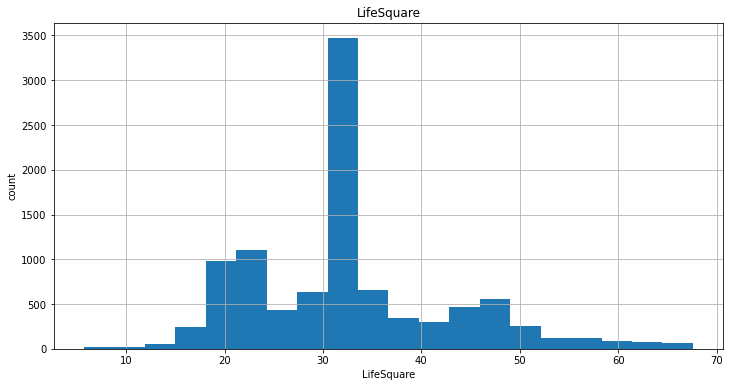

In [775]:
plt.figure(figsize = (12, 6))
df['LifeSquare'].hist(bins=20)
plt.ylabel('count')
plt.xlabel('LifeSquare')

plt.title('LifeSquare')
plt.show()

Посмотрим на данные о **количестве комнат**.

In [776]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

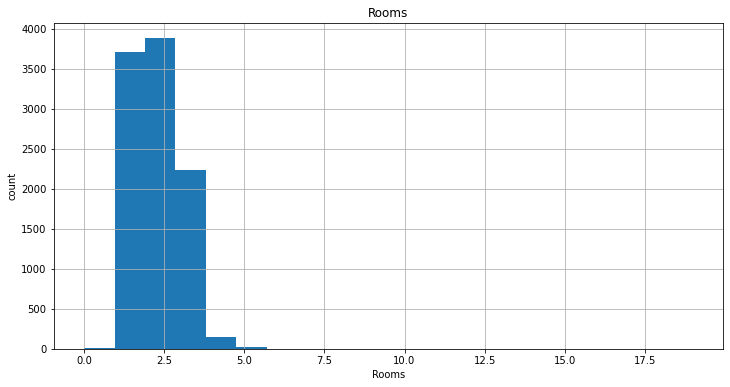

In [777]:
plt.figure(figsize = (12, 6))
df['Rooms'].hist(bins=20)
plt.ylabel('count')
plt.xlabel('Rooms')

plt.title('Rooms')
plt.show()

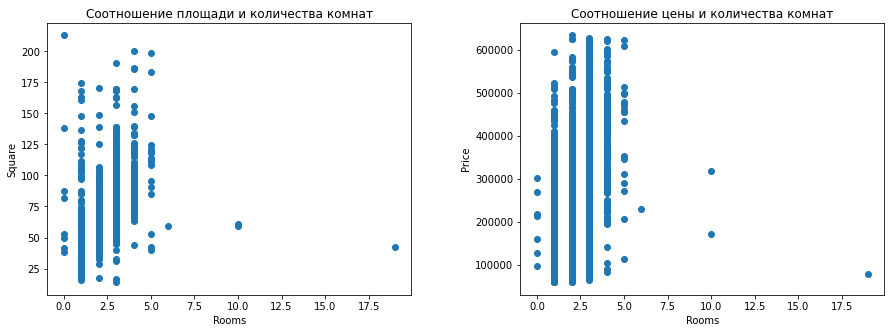

In [778]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.scatter(df['Rooms'], df['Square'])
ax1.set_xlabel('Rooms')
ax1.set_ylabel('Square')
ax1.set_title('Соотношение площади и количества комнат')
ax2.scatter(df['Rooms'], df['Price'])
ax2.set_xlabel('Rooms')
ax2.set_ylabel('Price')
ax2.set_title('Соотношение цены и количества комнат')
fig.set_size_inches(15, 5)
plt.subplots_adjust(wspace=0.3)

0 комнат в квартирре быть не может. Также большое количество комнат не коррелирует с ценой и площадью, из чего делаем вывод об ошибке в данных. Заменим эти значения Rooms медианой.

In [779]:
df.loc[(df['Rooms'] == 0) | (df['Rooms'] > 6), 'Rooms'] = df.Rooms.median()

In [780]:
df.Rooms = df.Rooms.astype('int')

**Floor** и **HouseFloor**

В доме не может быть 0 этажей. Заменим 0 медианой.

In [781]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

Этаж не может быть больше количества этажей в доме. Попробуем исправить подобную ситуацию.

In [782]:
df.loc[df['HouseFloor'] < df['Floor'], 'Floor'] = \
df.loc[df.loc[df['HouseFloor'] < df['Floor']].index, 'HouseFloor'].apply(lambda x: np.random.randint(1, x+1))

Посмотрим на значения **года постройки** и устраним аномалии с помощью моды.

In [783]:
df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [784]:
df.loc[(df['HouseYear'] > 2020) | (df['HouseYear'] < 1910), 'HouseYear'] = df['HouseYear'].mode()[0]

Оценим значения **экологических показателей** местности.

In [785]:
df['Ecology_1'].sort_values().unique()

array([0.0000000e+00, 1.8000000e-09, 6.9989299e-05, 7.8152800e-05,
       1.6967600e-04, 6.9911900e-04, 9.9136296e-04, 9.9536299e-04,
       2.2116650e-03, 4.9493578e-03, 5.7674511e-03, 6.0761520e-03,
       7.1223169e-03, 7.6585151e-03, 7.7202818e-03, 1.1319810e-02,
       1.1654127e-02, 1.2338886e-02, 1.2521634e-02, 1.4057920e-02,
       1.4072961e-02, 1.4333947e-02, 1.4423114e-02, 1.4580716e-02,
       1.5016892e-02, 1.7647052e-02, 1.9508796e-02, 2.0741327e-02,
       2.5609156e-02, 3.3493709e-02, 3.4331497e-02, 3.4656081e-02,
       3.5145268e-02, 3.6122292e-02, 3.6270089e-02, 3.7177820e-02,
       3.7316453e-02, 3.8692988e-02, 4.0242765e-02, 4.1116353e-02,
       4.1124634e-02, 4.1365445e-02, 4.2031586e-02, 4.2307273e-02,
       4.9637258e-02, 4.9863387e-02, 5.0272014e-02, 5.0755568e-02,
       5.0900057e-02, 5.1815435e-02, 5.1942062e-02, 6.0753047e-02,
       6.9660343e-02, 6.9753364e-02, 7.2157584e-02, 7.5423680e-02,
       7.5778753e-02, 8.1943460e-02, 8.6885266e-02, 8.7619089e

/opt/anaconda3/envs/PythonForDS/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


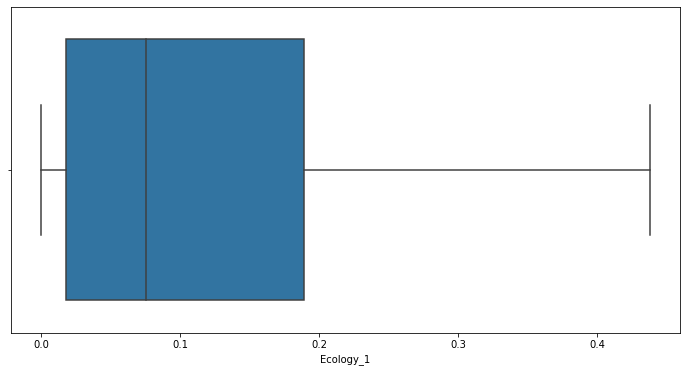

In [809]:
plt.figure(figsize = (12, 6))
sns.boxplot(df['Ecology_1'], whis=1.5, orient='h')

plt.xlabel('Ecology_1')
plt.show()

In [787]:
df['Ecology_2'].sort_values().unique()

['A', 'B']
Categories (2, object): ['A', 'B']

In [788]:
df['Ecology_3'].sort_values().unique()

['A', 'B']
Categories (2, object): ['A', 'B']

In [818]:
df['Ecology_2'] = (df['Ecology_2'] == 'A').astype(int)
df['Ecology_3'] = (df['Ecology_3'] == 'A').astype(int)

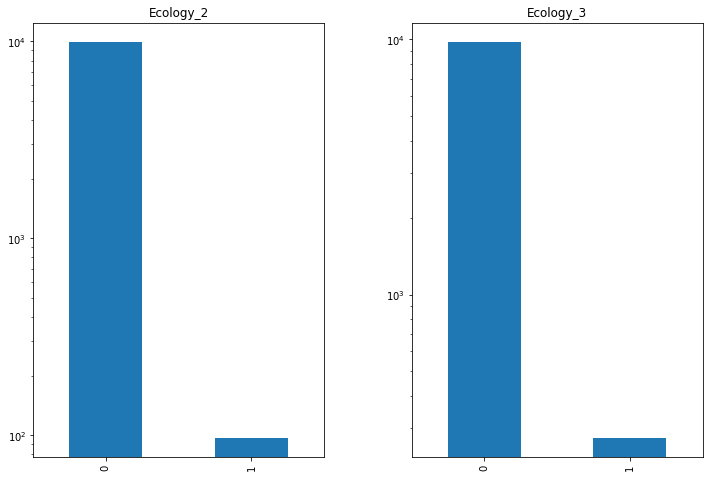

In [819]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
df['Ecology_2'].value_counts().plot(ax=ax1, kind='bar', logy=True)
ax1.set_title('Ecology_2')
df['Ecology_3'].value_counts().plot(ax=ax2, kind='bar', logy=True)
ax2.set_title('Ecology_3')
fig.set_size_inches(12, 8)
plt.subplots_adjust(wspace=0.3)

Обработаем выбросы 'Ecology_1'.

In [790]:
df.loc[(df['Ecology_1'] > df['Ecology_1'].quantile(.975)) \
                | (df['Ecology_1'] < df['Ecology_1'].quantile(.025)), 'Ecology_1'] = df['Ecology_1'].median()

Оценим значения **социальных показателей местности**.

In [791]:
df['Social_1'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 41, 42, 43, 46, 47, 49, 50, 52, 53, 66, 74],
      dtype=int8)

/opt/anaconda3/envs/PythonForDS/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


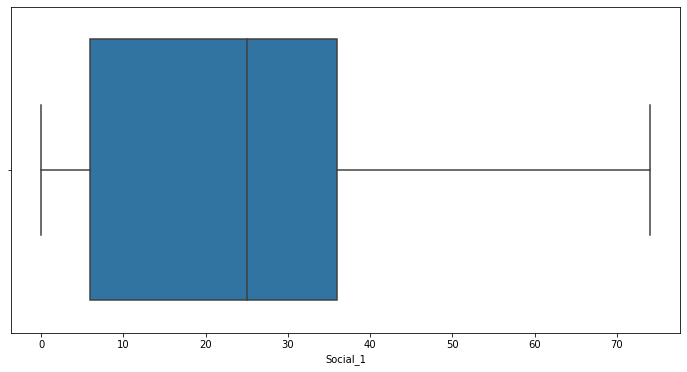

In [811]:
plt.figure(figsize = (12, 6))
sns.boxplot(df['Social_1'], whis=1.5, orient='h')

plt.xlabel('Social_1')
plt.show()

In [793]:
df['Social_2'].sort_values().unique()

array([  168,   186,   264,   290,   388,   469,   475,   507,   528,
         568,   629,   662,   760,   915,  1135,  1227,  1318,  1423,
        1437,  1497,  1564,  1660,  1768,  1892,  1952,  1986,  2270,
        2277,  2370,  2398,  2423,  2514,  2733,  2738,  2748,  2787,
        2810,  2940,  3079,  3097,  3151,  3293,  3369,  3374,  3379,
        3433,  3478,  3594,  3681,  3684,  3746,  3806,  3856,  3889,
        3893,  3975,  4017,  4048,  4231,  4346,  4378,  4386,  4439,
        4472,  4583,  4625,  4635,  4724,  4756,  4788,  4789,  4798,
        4860,  5011,  5027,  5048,  5067,  5148,  5212,  5261,  5285,
        5288,  5469,  5487,  5562,  5569,  5613,  5648,  5664,  5731,
        5735,  5776,  5889,  5992,  6119,  6137,  6141,  6149,  6207,
        6398,  6533,  6558,  6564,  6566,  6714,  6746,  6748,  6783,
        6856,  7010,  7065,  7077,  7227,  7287,  7425,  7538,  7614,
        7651,  7687,  7715,  7759,  7960,  7976,  8004,  8429,  8647,
        8667,  9292,

/opt/anaconda3/envs/PythonForDS/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


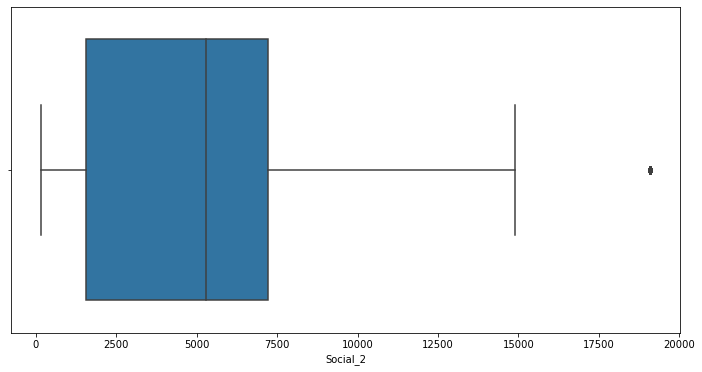

In [812]:
plt.figure(figsize = (12, 6))
sns.boxplot(df['Social_2'], whis=1.5, orient='h')

plt.xlabel('Social_2')
plt.show()

In [795]:
df['Social_3'].value_counts().sort_index()

0      2997
1      1861
2       635
3      1136
4       835
5       391
6       423
7       184
8       170
9       192
10      142
11      172
14       97
16      101
19       22
20       19
23       18
24       37
27       59
37        3
39       15
45        9
48       58
56       49
59       25
73       10
84       43
87       27
93       25
141     245
Name: Social_3, dtype: int64

/opt/anaconda3/envs/PythonForDS/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


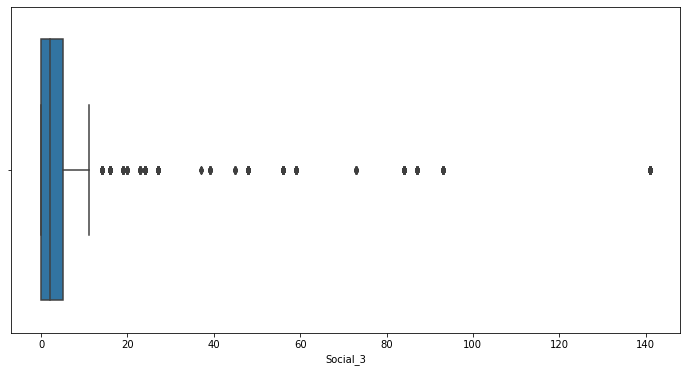

In [813]:
plt.figure(figsize = (12, 6))
sns.boxplot(df['Social_3'], whis=1.5, orient='h')

plt.xlabel('Social_3')
plt.show()

Практически в половине объектов признак **Healthcare_1** не заполнен, скорее всего его как-то можно использовать, но мы его удалим.

In [798]:
df.drop('Healthcare_1', axis=1, inplace=True)

**Helthcare_2**

In [799]:
df['Helthcare_2'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int8)

In [800]:
df['Helthcare_2'].value_counts().sort_index()

0    4214
1    2183
2    1158
3    1670
4     288
5     388
6      99
Name: Helthcare_2, dtype: int64

/opt/anaconda3/envs/PythonForDS/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


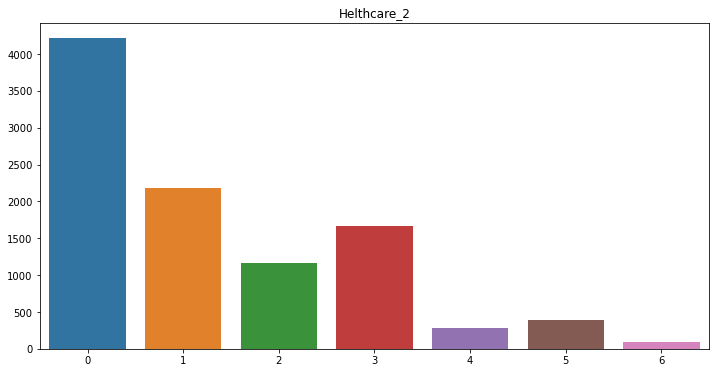

In [814]:
plt.figure(figsize = (12, 6))
counts = df['Helthcare_2'].value_counts()
plt.title('Helthcare_2')
sns.barplot(counts.index, counts.values)
plt.show()

**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров

In [802]:
df['Shops_1'].value_counts().sort_index()

0     2316
1     1325
2      964
3      711
4      841
5     1324
6      487
7      294
8      253
9      316
10     215
11     401
15     176
16      83
19      49
23     245
Name: Shops_1, dtype: int64

/opt/anaconda3/envs/PythonForDS/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


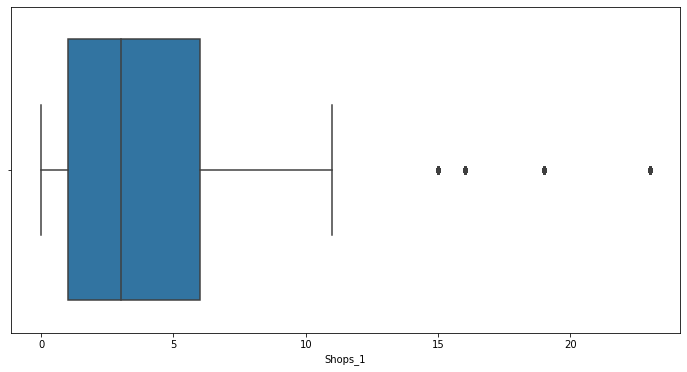

In [815]:
plt.figure(figsize = (12, 6))
sns.boxplot(df['Shops_1'], whis=1.5, orient='h')

plt.xlabel('Shops_1')
plt.show()

In [804]:
df['Shops_2'].value_counts().sort_index()

A     825
B    9175
Name: Shops_2, dtype: int64

/opt/anaconda3/envs/PythonForDS/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


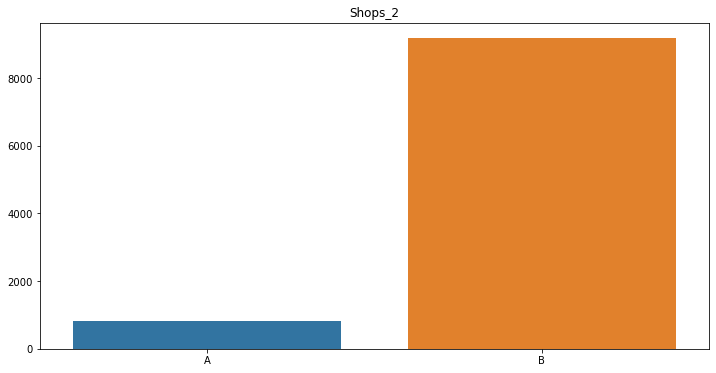

In [816]:
plt.figure(figsize = (12, 6))
counts = df['Shops_2'].value_counts()
plt.title('Shops_2')
sns.barplot(counts.index, counts.values)
plt.show()

### Генерация новых признаков

Как правило в многоэтажных домах первые и последние этажи ценятся меньше. Сгенерируем новый признак **'bag_floor'**

In [806]:
df['bag_floor'] = 0
df.loc[(df['Floor'] == 1) & (df['HouseFloor'] > 3), 'bag_floor'] = 1
df.loc[(df['Floor'] == df['HouseFloor']) & (df['HouseFloor'] > 3), 'bag_floor'] = 1

Сгенерируем новый признак **'Social_3_anomaly'** на основе аномальности значений 'Social_3'

In [797]:
df['Social_3_anomaly'] = 0
df.loc[df['Social_3'] > df['Social_3'].quantile(.975), 'Social_3_anomaly'] = 1

На основе данных о площади сгенерируем призники отражающие **долю жилой площади** в площади квартиры и **долю площади кухни**.

In [817]:
df['LifeSquareFrac'] = df['LifeSquare'] / df['Square']
df['KitchenSquareFrac'] = df['KitchenSquare'] / df['Square']
df.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Social_3_anomaly,bag_floor,LifeSquareFrac,KitchenSquareFrac
0,11809,27,3,115.027313,31.274471,10.0,4,10.0,2014,0.075424,...,3097,0,0,0,B,305018.875000,0,0,0.271887,0.086936
1,3013,22,1,39.832523,23.169222,8.0,7,8.0,1966,0.118537,...,6207,1,1,0,B,177734.546875,0,0,0.581666,0.200841
2,8215,1,3,78.342216,47.671970,10.0,2,17.0,1988,0.025609,...,5261,0,3,1,B,282078.718750,0,0,0.608509,0.127645


In [820]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Social_3_anomaly,bag_floor,LifeSquareFrac,KitchenSquareFrac
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.888800,56.202213,32.408596,7.348500,7.399800,12.959100,1984.863800,0.112456,0.009700,0.027500,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.937500,0.024500,0.130700,0.592020,0.140159
std,0.812096,18.936783,10.206590,2.255189,5.033596,6.443573,18.409979,0.109964,0.098015,0.163543,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.273438,0.154603,0.337089,0.124542,0.048663
min,1.000000,13.784864,5.735331,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.777344,0.000000,0.000000,0.046974,0.027348
25%,1.000000,41.794393,24.690284,6.000000,3.000000,9.000000,1974.000000,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.628906,0.000000,0.000000,0.522677,0.104265
50%,2.000000,52.513309,31.274471,6.000000,6.000000,13.000000,1977.000000,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.648438,0.000000,0.000000,0.597488,0.134038
75%,2.000000,65.889257,35.888227,9.000000,11.000000,17.000000,2001.000000,0.188784,0.000000,0.000000,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.460938,0.000000,0.000000,0.667200,0.166424
max,6.000000,212.932358,67.595032,30.000000,42.000000,117.000000,2020.000000,0.437885,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.437500,1.000000,1.000000,2.268754,0.507803


In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Id                 10000 non-null  object  
 1   DistrictId         10000 non-null  category
 2   Rooms              10000 non-null  int64   
 3   Square             10000 non-null  float32 
 4   LifeSquare         10000 non-null  float32 
 5   KitchenSquare      10000 non-null  float32 
 6   Floor              10000 non-null  int64   
 7   HouseFloor         10000 non-null  float32 
 8   HouseYear          10000 non-null  int32   
 9   Ecology_1          10000 non-null  float32 
 10  Ecology_2          10000 non-null  int64   
 11  Ecology_3          10000 non-null  int64   
 12  Social_1           10000 non-null  int8    
 13  Social_2           10000 non-null  int16   
 14  Social_3           10000 non-null  int16   
 15  Helthcare_2        10000 non-null  int8    
 16  Shops